<!-- # 1. IMPORTS -->

# 1. IMPORTS

## 1.1 Libraries

In [4]:
import pandas as pd 
import numpy as np 
import re 
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px

## 1.2 Raw data

In [6]:
folder = "generated/"

df_movies=pd.read_csv(folder + "final_movie_dataset.csv",index_col = 'Wikipedia movie ID')

# 2. PRELIMINARY ANALYSIS
Our objective in this notebook is to get to know our dataset by plotting a few key distributions, in order to better evaluate which data is available to us and how to make the best use of it. 

## 2.1 Number of movies

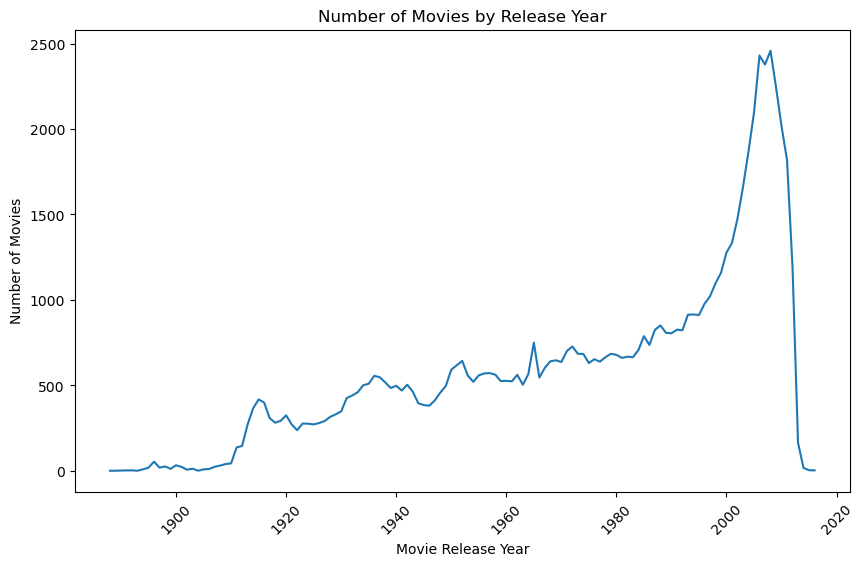

In [9]:
#plot the number of movies over time
plt.figure(figsize=(10, 6))
df_movies['Movie release year'].value_counts().sort_index().plot(kind='line')
plt.xlabel("Movie Release Year")
plt.ylabel("Number of Movies")
plt.title("Number of Movies by Release Year")
plt.xticks(rotation=45)

#plt.savefig('visuals/NbMovies_ReleaseYear.png')
plt.show()

In [10]:
#see how many movies for each year
df_movies['Movie release year'].value_counts().sort_index()


Movie release year
1888.0       1
1889.0       1
1890.0       2
1891.0       3
1892.0       3
          ... 
2012.0    1190
2013.0     164
2014.0      17
2015.0       4
2016.0       3
Name: count, Length: 129, dtype: int64

## 2.2 Box office

In [12]:
#prepare data to plot the median box office and sample count per year
df_plot = df_movies.dropna(subset=['Movie release year', 'Movie box office revenue'])
average_revenue_stats = df_plot.groupby('Movie release year')['Movie box office revenue'].agg(['median', 'count'])
average_revenue_stats.columns = ['Average Revenue', 'Sample Count']
average_revenue_stats.head(5)

Average Revenue  Sample Count
Movie release year                               
1897.0                 3.074659e+06             1
1913.0                 5.534387e+07             1
1914.0                 3.074659e+07             5
1915.0                 3.639237e+06             4
1916.0                 4.181299e+07             3

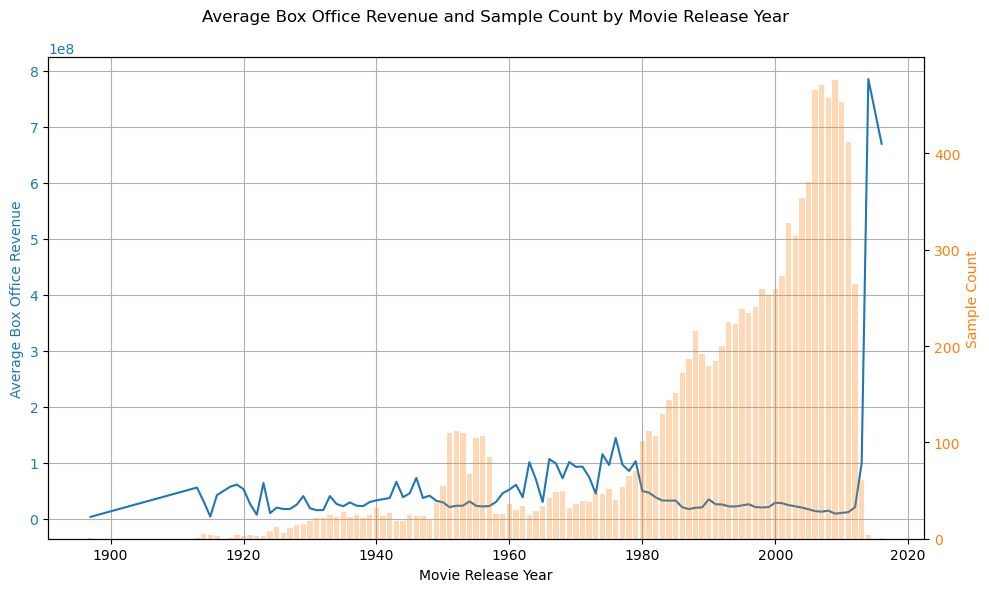

In [13]:
#plot the sample count and average box office over time. 
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel("Movie Release Year")
ax1.set_ylabel("Average Box Office Revenue", color="tab:blue")
ax1.plot(average_revenue_stats.index, average_revenue_stats['Average Revenue'], color="tab:blue", label="Average Revenue")
ax1.tick_params(axis='y', labelcolor="tab:blue")
ax1.grid(True)

ax2 = ax1.twinx()
ax2.set_ylabel("Sample Count", color="tab:orange")
ax2.bar(average_revenue_stats.index, average_revenue_stats['Sample Count'], color="tab:orange", alpha=0.3, label="Sample Count")
ax2.tick_params(axis='y', labelcolor="tab:orange")

fig.suptitle("Average Box Office Revenue and Sample Count by Movie Release Year")
fig.tight_layout()
plt.show()

## 2.3 Genres

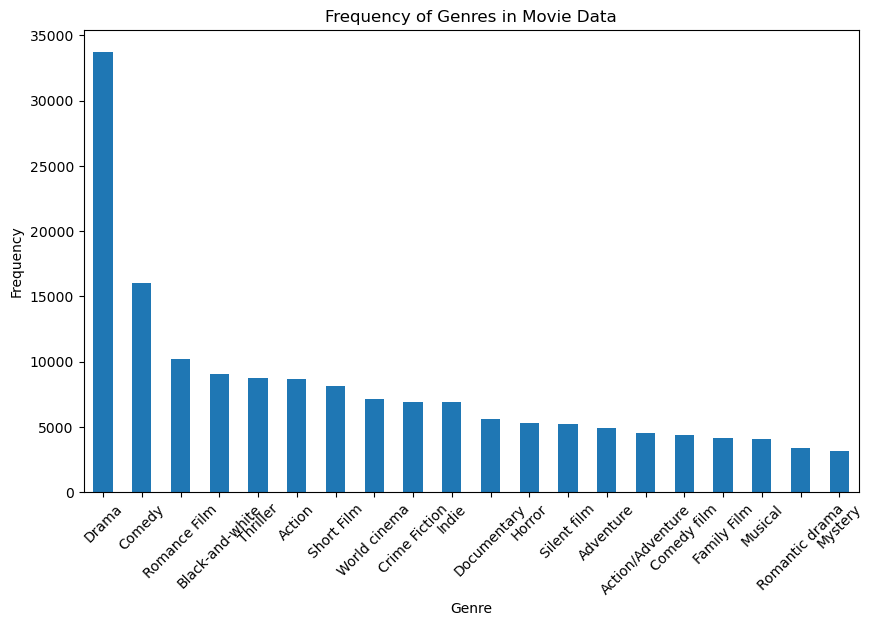

In [15]:
#how frequent each genre appears is in each dataset.

#Create list of all genres for each movie one after the other 
df_movies['Movie genres'] = df_movies['Movie genres'].apply(lambda x: re.findall(r"'(.*?)'", x) if isinstance(x, str) else x)
genres_list = sum(df_movies['Movie genres'].tolist(), [])

#count occurences in list
genre_counts = pd.Series(genres_list).value_counts()

#Plot the 20 most popular genres
plt.figure(figsize=(10, 6))
genre_counts[:20].plot(kind='bar')
plt.xlabel("Genre")
plt.ylabel("Frequency")
plt.title("Frequency of Genres in Movie Data")
plt.xticks(rotation=45)
plt.show()

In [16]:
#print count for each genre
genre_counts.to_string()

'Drama                                       33730\nComedy                                      15988\nRomance Film                                10161\nBlack-and-white                              9060\nThriller                                     8715\nAction                                       8696\nShort Film                                   8094\nWorld cinema                                 7136\nCrime Fiction                                6930\nIndie                                        6881\nDocumentary                                  5621\nHorror                                       5260\nSilent film                                  5237\nAdventure                                    4871\nAction/Adventure                             4524\nComedy film                                  4344\nFamily Film                                  4169\nMusical                                      4080\nRomantic drama                               3365\nMystery                       

## 2.5 Countries

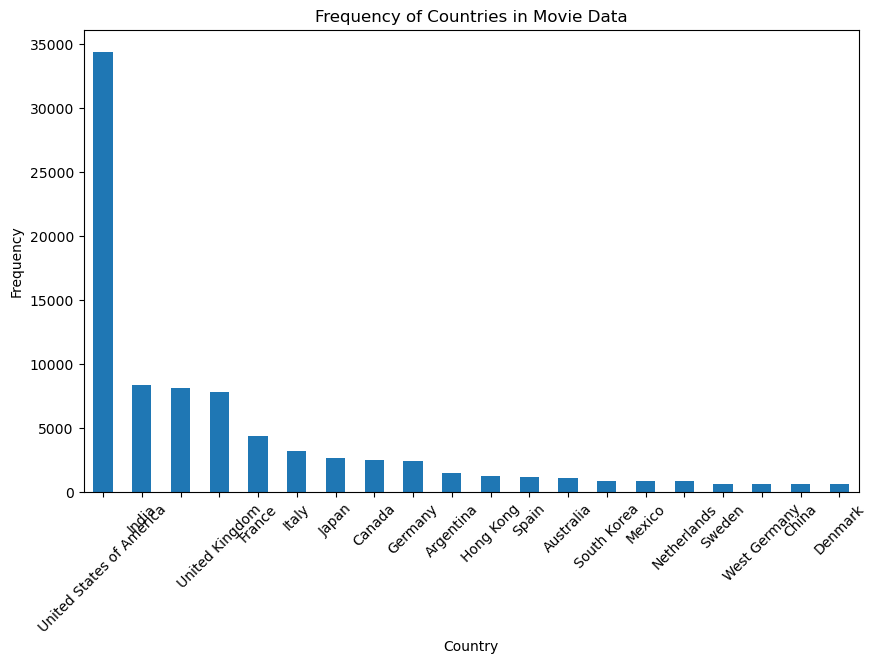

In [18]:
#how frequent each countries appears is in each dataset.

#Create list of all countries for each movie one after the other 
df_movies['Movie countries'] = df_movies['Movie countries'].apply(lambda x: re.findall(r"'(.*?)'", x) if isinstance(x, str) else x)

countries_list = sum(df_movies['Movie countries'].tolist(), [])

country_counts = pd.Series(countries_list).value_counts()

#Plot the 20 most popular countries
plt.figure(figsize=(10, 6))
country_counts[:20].plot(kind='bar')
plt.xlabel("Country")
plt.ylabel("Frequency")
plt.title("Frequency of Countries in Movie Data")
plt.xticks(rotation=45)
plt.show()
#empty is nan

In [19]:
#print count for each country
country_counts.to_string()

'United States of America                    34350\nIndia                                        8387\n                                             8110\nUnited Kingdom                               7841\nFrance                                       4390\nItaly                                        3160\nJapan                                        2640\nCanada                                       2531\nGermany                                      2387\nArgentina                                    1468\nHong Kong                                    1239\nSpain                                        1135\nAustralia                                    1109\nSouth Korea                                   887\nMexico                                        868\nNetherlands                                   838\nSweden                                        655\nWest Germany                                  647\nChina                                         643\nDenmark                       

## 2.6 Runtime

In [21]:
df_movies

Movie name  \
Wikipedia movie ID                                                      
975900                                                 Ghosts of Mars   
3196793             Getting Away with Murder: The JonBenét Ramsey ...   
28463795                                                  Brun bitter   
9363483                                              White Of The Eye   
261236                                              A Woman in Flames   
...                                                               ...   
35228177                                     Mermaids: The Body Found   
34980460                                                      Knuckle   
9971909                                             Another Nice Mess   
913762              The Super Dimension Fortress Macross II: Lover...   
12476867                                                      Spliced   

                    Movie release month  Movie release year  \
Wikipedia movie ID                                            
975900                              8.0              2001.0   
3196793                             2.0              2000.0   
28463795                            NaN              1988.0   
9363483                             NaN              1987.0   
261236                              5.0              1983.0   
...                                 ...                 ...   
35228177                            3.0              2011.0   
34980460                            1.0              2011.0   
9971909                             9.0              1972.0   
913762                              5.0              1992.0   
12476867                            NaN              2002.0   

                   Movie release date  Movie box office revenue  \
Wikipedia movie ID                                                
975900                     2001-08-24              2.477118e+07   
3196793                    2000-02-16                       NaN   
28463795                          NaN                       NaN   
9363483                           NaN                       NaN   
261236                     1983-05-11                       NaN   
...                               ...                       ...   
35228177                   2011-03-19                       NaN   
34980460                   2011-01-21                       NaN   
9971909                    1972-09-22                       NaN   
913762                     1992-05-21                       NaN   
12476867                          NaN                       NaN   

                    Movie runtime Movie languages             Movie countries  \
Wikipedia movie ID                                                              
975900                       98.0     ['English']  [United States of America]   
3196793                      95.0     ['English']  [United States of America]   
28463795                     83.0   ['Norwegian']                    [Norway]   
9363483                     110.0     ['English']            [United Kingdom]   
261236                      106.0      ['German']                   [Germany]   
...                           ...             ...                         ...   
35228177                    120.0     ['English']  [United States of America]   
34980460                     96.0     ['English']   [Ireland, United Kingdom]   
9971909                      66.0     ['English']  [United States of America]   
913762                      150.0    ['Japanese']                     [Japan]   
12476867                     86.0     ['English']                    [Canada]   

                                                         Movie genres  \
Wikipedia movie ID                                                      
975900              [Thriller, Science Fiction, Horror, Adventure,...   
3196793              [Mystery, Biographical film, Drama, Crime Drama]   
28463795                                       [Crime Fiction, Drama]  

In [22]:
#Create intervals
bins = [0, 60, 120, float('inf')] 
labels = ['Short', 'Medium', 'Long']

# Categorize movies
df_movies['Movie runtime category'] = pd.cut(df_movies['Movie runtime'], bins=bins, labels=labels)

C:\Users\nicol\AppData\Local\Temp\ipykernel_28076\2217109124.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_movies.groupby(['Movie release month', 'Movie runtime category']).size().unstack()


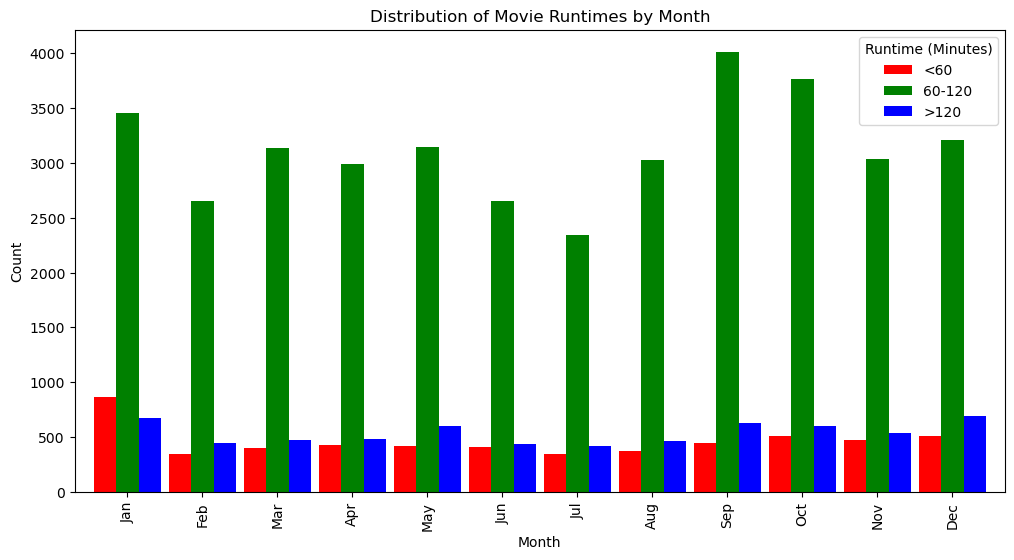

In [23]:
#Group data by month and runtime category
grouped = df_movies.groupby(['Movie release month', 'Movie runtime category']).size().unstack()

#plot
grouped.plot(
    kind='bar',
    color=['red', 'green', 'blue'],  # Adjust colors
    figsize=(12, 6),
    width=0.9
)

plt.title("Distribution of Movie Runtimes by Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.xticks(range(12), [
    "Jan", "Feb", "Mar", "Apr", "May", "Jun", 
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
])

plt.legend(title="Runtime (Minutes)", labels=['<60', '60-120', '>120'])
plt.show()


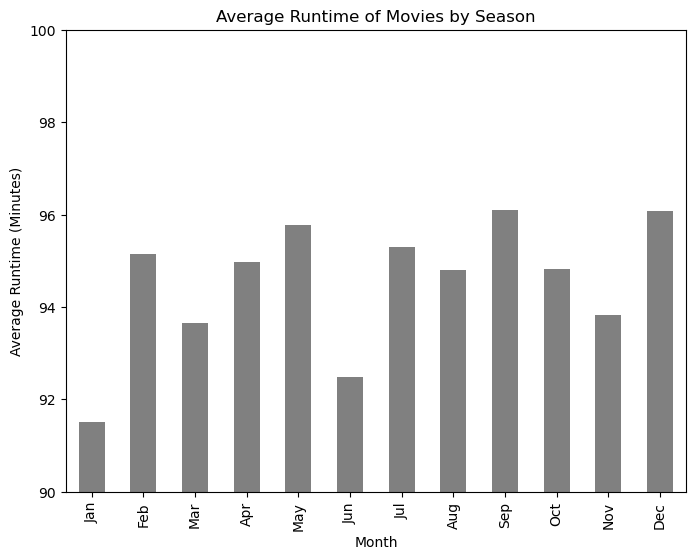

In [24]:
#instead of intervals, compute the mean runtime
avg_runtime_month = df_movies.groupby('Movie release month')['Movie runtime'].mean().reindex(
    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

# Plot
plt.figure(figsize=(8, 6))
avg_runtime_month.plot(kind='bar', color='gray')
plt.ylim(90, 100)  # Set the y-axis limits
plt.title("Average Runtime of Movies by Season")
plt.xlabel("Month")
plt.ylabel("Average Runtime (Minutes)")
plt.xticks(ticks=range(0, 12), labels=[
    "Jan", "Feb", "Mar", "Apr", "May", "Jun", 
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
])
plt.show()

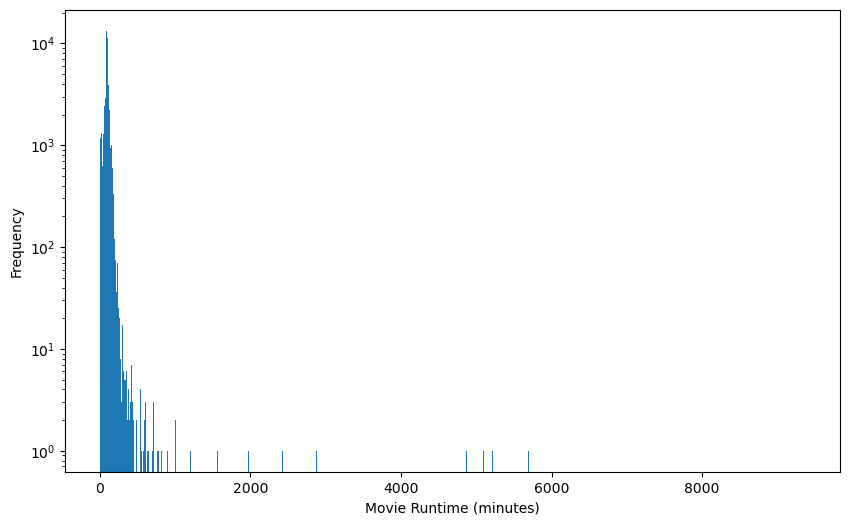

In [25]:
#Plot runtime occurences in logscale
runtime = df_movies['Movie runtime'].sort_values()
plt.figure(figsize=(10, 6))
plt.hist(runtime.values, bins=1000, log=True)
plt.xlabel("Movie Runtime (minutes)")
plt.ylabel("Frequency")
# plt.xscale('log')
plt.yscale('log')

## 2.7 Sentiment Score

In [27]:
#compute the mean of compound score by year
plot_df = df_movies.dropna(subset=['Movie release year', 'Compound Score'])

mean_compound_score_per_year = plot_df.groupby('Movie release year')['Compound Score'].mean()
mean_compound_score_per_year = pd.DataFrame(mean_compound_score_per_year)


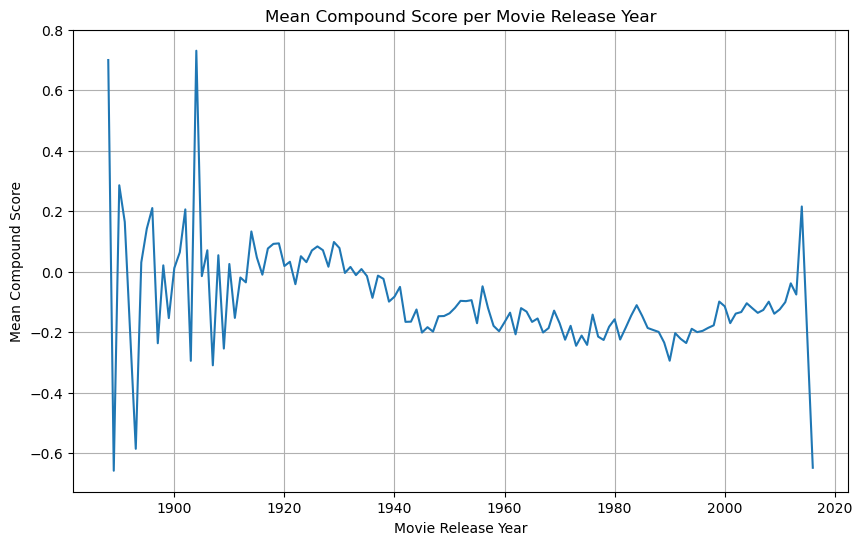

In [28]:
#plot mean compound score for each year
plt.figure(figsize=(10, 6))
plt.plot(mean_compound_score_per_year.index, mean_compound_score_per_year['Compound Score'])
plt.xlabel('Movie Release Year')
plt.ylabel('Mean Compound Score')
plt.title('Mean Compound Score per Movie Release Year')
plt.grid(True)
plt.show()

# KEY INSIGHTS
- Our dataset contains less movies in the earlier years than in the later years. We don't think this is due to movies becoming more popular, we assume a recent movie has more chance to be included in the dataset compared to a movie filmed 100 years ago.

- Box Office is fairly constant across years with a few outliers, the normalization for inflation worked great. It will be useful for further analysis later on. 

- There are a lot of genres, most with a low frequency. We will have to do our analysis across the most popular genres to have a decent sample size. Some genres are way too specific, we could merge some genres (like children movies and family movies for example) to have a greater sample size.

- The majority of our dataset contains movies from the USA, we might have to focus our analysis on USA movies only. It makes it also easier to comment on USA events.

- Most movies are in the 60 to 120 min interval. It seems movies are NOT longer during the winter months, interesting finding to investigate further on... There also are some outlier runtimes that are not errors.

- The compound score is clearly varies with time. It will be interesting to analyze it. 